# Análisis Simulaciones MadGraph/Pythia8/Delphes
Los outputs están en *sim_outputs/*.

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

## Simulación con $g_{Sg} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

## Simulación con $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV), proceso p p > y0 y0 j j, y0 > xd xd~, y0 > xd xd~

## Simulación con $g_{Sg1} = 1.0$ y $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

## Simulación con $g_{Sq} = 1.0$ únicamente
$q = u,d,c,s,b,t$



Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

In [2]:
cases = ["gSq_only","gSg1_only", "gSg2_only_y0y0", "gSg_only"]
csvDir = "sim_outputs/csv/"
nFiles = 2
dataSignal = {}
for i in cases:
    dataSignal[i] = []
    for j in range(1,3):
        csvFiles = [csvDir+f"DM_{i}_{j}_{k}.csv" for k in range(1, nFiles+1)]
        dfs = [pd.read_csv(csvFile) for csvFile in csvFiles]
        data = pd.concat(dfs)
        data = construct_variables(data)
        dataSignal[i].append(data)
        data.to_csv(csvDir+f"DM_{i}_{j}.csv")

In [3]:
dataSignal[cases[0]][0]

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi,Delta_phi,Delta_rapidity,Inv_mass,Rapidity_prod
0,587.76620,385.95130,131.040330,122.932600,0.296047,-0.272385,0.834014,-1.863163,0.094789,3.069810,...,0.0,0.0,0.0,0.0,19.287659,2.191181,2.975021,0.568432,1981.557256,-0.080639
1,581.54410,436.21936,83.219740,77.175460,-0.194645,-0.263525,1.984020,1.721943,0.981479,-2.292222,...,0.0,0.0,0.0,0.0,1.908746,-1.010366,3.009484,0.068881,2155.878344,0.051294
2,512.64810,478.75130,92.114470,77.946396,0.681759,0.929280,0.428407,-2.692056,-1.842054,1.345399,...,0.0,0.0,0.0,0.0,27.675697,1.788336,3.095732,0.247521,2220.357859,0.633544
3,513.04944,461.67330,32.523200,20.744324,-0.403126,0.052357,1.536719,-2.375048,1.191354,-1.936878,...,0.0,0.0,0.0,0.0,17.423433,1.731998,3.128232,0.455483,2212.474397,-0.021106
4,524.09780,470.95132,38.144970,26.992750,-0.334820,-1.132830,2.517650,1.666349,-0.315133,2.981305,...,0.0,0.0,0.0,0.0,15.168061,1.078169,2.986748,0.798010,2060.446486,0.379294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,339.16296,278.48640,270.646970,38.509890,2.252886,-0.268343,-0.027483,-1.068676,-1.348766,0.481609,...,0.0,0.0,0.0,0.0,14.005915,1.563592,1.830375,2.521229,760.770677,-0.604546
49996,649.90906,404.32632,186.804930,146.054730,1.214298,1.249632,1.817205,0.348900,3.099792,0.407678,...,0.0,0.0,0.0,0.0,29.517960,0.178339,2.692114,0.035334,1836.091837,1.517426
49997,517.47460,462.71768,311.530100,114.938250,1.463504,0.605916,0.955727,-0.772980,2.125550,-0.307948,...,0.0,0.0,0.0,0.0,16.874056,-0.536175,2.433498,0.857588,1443.713646,0.886761
49998,506.43152,473.26617,70.966490,65.303140,0.884347,1.254224,0.467184,1.081896,-1.719159,1.314110,...,0.0,0.0,0.0,0.0,11.164414,-1.759738,3.033269,0.369878,2115.635827,1.109169


In [4]:
# Análisis con csv file
data_gSg1 = dataSignal['gSg1_only']

In [5]:
folder = 'Plots/gSg1/mx10_my_100_'
makePlots(data_gSg1[0],folder=folder)
folder = 'Plots/gSg1/mx10_my_2000_'
makePlots(data_gSg1[1],folder=folder)

In [6]:
# Análisis con csv file
data_gSg2 = dataSignal['gSg2_only_y0y0']

In [7]:
folder = 'Plots/gSg2_y0y0/mx10_my_100_'
makePlots(data_gSg2[0],folder=folder)
folder = 'Plots/gSg2_y0y0/mx10_my_2000_'
makePlots(data_gSg2[1],folder=folder)

In [8]:
data_gSg = dataSignal['gSg_only']

In [9]:
folder = 'Plots/gSg/mx10_my_100_'
makePlots(data_gSg[0],folder=folder)
folder = 'Plots/gSg/mx10_my_2000_'
makePlots(data_gSg[1],folder=folder)

In [10]:
data_gSq = dataSignal['gSq_only']

In [11]:
folder = 'Plots/gSq/mx10_my_100_'
makePlots(data_gSq[0], folder=folder)
folder = 'Plots/gSq/mx10_my_2000_'
makePlots(data_gSq[1], folder=folder)

Background

In [12]:
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

In [13]:
data_gSg1[0]

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi,Delta_phi,Delta_rapidity,Inv_mass,Rapidity_prod
0,240.99890,114.49839,87.032740,53.953247,0.941289,-2.928320,0.283154,-0.158920,-1.860497,1.061186,...,0.0,0.0,0.0,0.0,4.309747,-2.326780,2.921684,3.869609,899.446579,-2.756395
1,620.46420,393.47095,226.895020,163.963640,0.350848,0.027495,-0.322867,-2.213653,-1.008741,1.685402,...,0.0,0.0,0.0,0.0,22.362581,-2.242071,2.694144,0.323354,1764.633317,0.009646
2,550.36810,329.56445,228.870640,17.185095,-1.308166,-0.101204,-2.644965,-1.343592,-3.093594,0.332764,...,0.0,0.0,0.0,0.0,4.538626,0.835823,2.856827,1.206961,1583.326432,0.132392
3,396.92612,269.07895,177.949370,147.682700,-1.037883,1.155310,0.481151,-0.949630,-0.654509,-2.797458,...,0.0,0.0,0.0,0.0,84.183586,3.084845,2.142948,2.193193,215.174490,-1.199076
4,379.97665,324.21918,105.799520,41.908695,-1.717872,0.110780,-2.016541,-1.098038,-2.065992,1.315231,...,0.0,0.0,0.0,0.0,6.868352,-1.125924,2.901962,1.828652,1209.709577,-0.190306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,349.92206,301.20975,243.270600,77.395150,1.199653,-0.774545,-0.743400,0.561299,2.275493,-0.630695,...,0.0,0.0,0.0,0.0,41.779602,0.808170,2.906188,1.974198,1076.848708,-0.929185
49996,438.84595,422.38397,195.222820,124.105660,0.720691,-0.435122,2.064605,-0.880524,2.191059,-1.162015,...,0.0,0.0,0.0,0.0,12.024345,2.850709,2.930112,1.155813,1683.595357,-0.313588
49997,595.91350,472.03800,60.737587,34.926380,-0.750302,-1.348598,2.687849,1.730231,-0.205658,2.796978,...,0.0,0.0,0.0,0.0,27.109678,2.537152,3.002636,0.598295,2238.861248,1.011856
49998,321.29672,311.65213,21.835484,15.294793,1.592977,-0.471541,-0.170694,0.470883,1.847830,-1.349792,...,0.0,0.0,0.0,0.0,6.416246,2.051967,3.085564,2.064518,1180.491679,-0.751154


In [14]:
folder = 'Plots/gSg1/'
datas = [data_ZpJ, data_WpJ, data_gSg1[0], data_gSg1[1]]
names = ['Z+Jets','W+Jets','gSg1 MY0=100GeV', 'gSg1 MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [15]:
folder = 'Plots/gSg2_y0y0/'
datas = [data_ZpJ, data_WpJ, data_gSg2[0], data_gSg2[1]]
names = ['Z+Jets','W+Jets','gSg2 MY0=100GeV', 'gSg2 MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [16]:
folder = 'Plots/gSg/'
datas = [data_ZpJ, data_WpJ, data_gSg[0], data_gSg[1]]
names = ['Z+Jets','W+Jets','gSg MY0=100GeV', 'gSg MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [17]:
folder = 'Plots/gSq/'
datas = [data_ZpJ, data_WpJ, data_gSq[0], data_gSq[1]]
names = ['Z+Jets','W+Jets','gSq MY0=100GeV', 'gSq MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [18]:
folder = 'Plots/'
datas = [data_ZpJ, data_WpJ, data_gSq[0], data_gSg1[0], data_gSg2[0], data_gSg[0]]
names = ['Z+Jets','W+Jets','Case 1', 'Case 2', 'Case 3', 'Case 4']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [19]:
CSs = {}
for i in cases:
    CSs[i] = []
    CSs[f"error{i}"] = []

In [20]:
htmlDir = "sim_outputs/html/"
nFiles = 2
CSs = {}
for i in cases:
    for j in range(1,3):
        CSs[f"{i}_{j}"] = []
        CSs[f"error{i}_{j}"] = []
        htmlFiles = [htmlDir+f"DM_{i}_{j}_{k}.html" for k in range(1, nFiles+1)]
        for k in range(1, nFiles+1):
            with open(htmlDir+f"DM_{i}_{j}_{k}.html", 'r') as htmlFile:
                htmlText = htmlFile.read()
            indexS = htmlText.find("<b>s= ")
            indexPM = htmlText.find(" &#177 ")
            indexPB = htmlText.find(" (pb)")
            CSs[f"{i}_{j}"].append(float(htmlText[indexS+6:indexPM]))
            CSs[f"error{i}_{j}"].append(float(htmlText[indexPM+7:indexPB]))

In [23]:
CSs["run"] = range(1,3)

In [24]:
CSs=pd.DataFrame(CSs)

In [25]:
CSs

,gSq_only_1,errorgSq_only_1,gSq_only_2,errorgSq_only_2,gSg1_only_1,errorgSg1_only_1,gSg1_only_2,errorgSg1_only_2,gSg2_only_y0y0_1,errorgSg2_only_y0y0_1,gSg2_only_y0y0_2,errorgSg2_only_y0y0_2,gSg_only_1,errorgSg_only_1,gSg_only_2,errorgSg_only_2,run
0,0.000884,0.000002,0.000037,6.840000e-08,41.303,0.0573,6.9563,0.00949,0.002105,0.000003,0.000163,2.630000e-07,41.213,0.0650,6.9680,0.0104,1
1,0.000884,0.000002,0.000037,6.680000e-08,41.158,0.0624,6.9652,0.01150,0.002104,0.000003,0.000163,2.720000e-07,41.204,0.0638,6.9753,0.0120,2


In [26]:
CSs["errorgSq_only_1"]/CSs["gSq_only_1"].std()

0    19.798990
1    20.827509
Name: errorgSq_only_1, dtype: float64

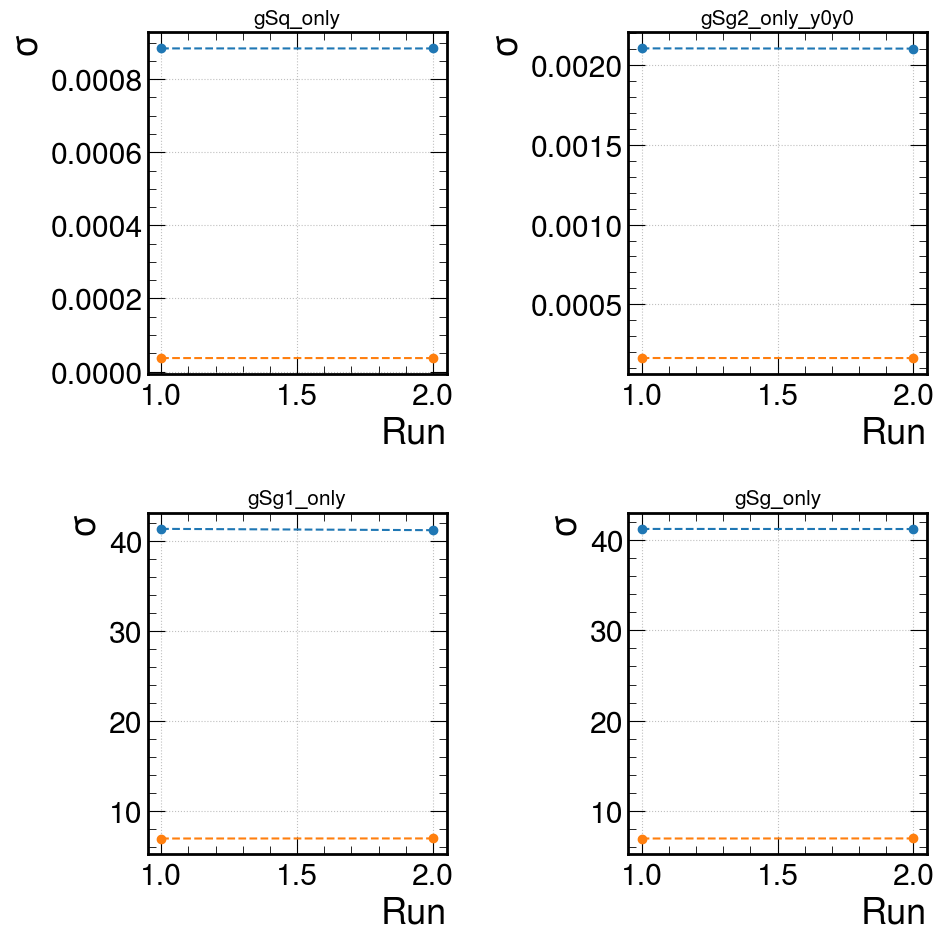

In [27]:
fig, ax = plt.subplots(2,2)
for i in range(2):
    ax[0,0].errorbar(CSs["run"], CSs[f"{cases[0]}_{i+1}"], yerr=CSs[f"error{cases[0]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[1,0].errorbar(CSs["run"], CSs[f"{cases[1]}_{i+1}"], yerr=CSs[f"error{cases[1]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[0,1].errorbar(CSs["run"], CSs[f"{cases[2]}_{i+1}"], yerr=CSs[f"error{cases[2]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[1,1].errorbar(CSs["run"], CSs[f"{cases[3]}_{i+1}"], yerr=CSs[f"error{cases[3]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
ax[0,0].set_title(cases[0], fontsize=15)
ax[1,0].set_title(cases[1], fontsize=15)
ax[0,1].set_title(cases[2], fontsize=15)
ax[1,1].set_title(cases[3], fontsize=15)
for i in range(2):
    for j in range(2):
        ax[i,j].set_ylabel(r'$\sigma$')
        ax[i,j].set_xlabel('Run')
        ax[i,j].grid()
fig.tight_layout()
plt.show()